## 🔍 Hierarchical Clustering
Hierarchical Clustering is a type of unsupervised machine learning algorithm used to group similar data points into clusters. Unlike other clustering techniques (like K-Means), hierarchical clustering creates a hierarchy of clusters in a tree-like structure called a dendrogram.

## 📂 Two Main Types of Hierarchical Clustering
### 1. Agglomerative Clustering (Bottom-Up)
- Starts with each data point as its own cluster.
- At each step, the two closest clusters are merged.
- Repeats until there’s only one cluster or a desired number of clusters.
- This is the most common approach.

### 2. Divisive Clustering (Top-Down)
- Starts with all points in one cluster.
- At each step, the algorithm splits the least similar cluster into two.
- Repeats until every point is in its own cluster or a stopping point is reached.

### 📌 Sample Dataset
#### 📊 Let’s use a tiny 2D dataset for easy understanding:

| Point | X | Y |
|-------|---|---|
| A     | 1 | 2 |
| B     | 2 | 2 |
| C     | 4 | 4 |
| D     | 5 | 4 |


In [1]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering

In [2]:
# Create Sample dataset
data = {
    'Point': ['A', 'B', 'C', 'D'],
    'X': [1, 2, 4, 5],
    'Y': [2, 2, 4, 4]
}

df = pd.DataFrame(data)
X = df[['X', 'Y']].values

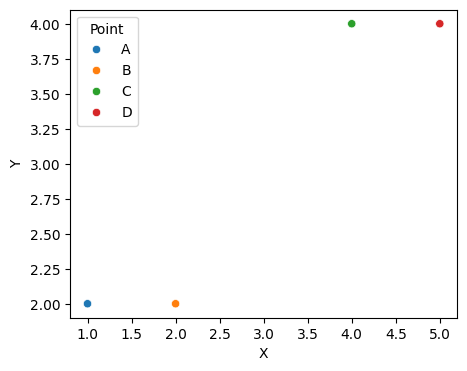

In [3]:
# Plot the points before create model
figure = plt.figure(figsize=(5,4))
sns.scatterplot(x='X', y='Y', data=df, hue='Point', legend=True)
plt.show()

### 📌 Manual Distance Calculations

We’ll compute **Euclidean distance** between each pair using the formula:

$$
\text{Distance}(P_i, P_j) = \sqrt{(x_i - x_j)^2 + (y_i - y_j)^2}
$$

---

| Pair | Calculation | Distance |
|------|-------------|----------|
| A-B  | √((1−2)² + (2−2)²) | √1 = **1.0** |
| A-C  | √((1−4)² + (2−4)²) | √13 ≈ **3.61** |
| A-D  | √((1−5)² + (2−4)²) | √20 ≈ **4.47** |
| B-C  | √((2−4)² + (2−4)²) | √8 ≈ **2.83** |
| B-D  | √((2−5)² + (2−4)²) | √13 ≈ **3.61** |
| C-D  | √((4−5)² + (4−4)²) | √1 = **1.0** |

---


## 1. Agglomerative Clustering (Bottom-Up)
### 📌 Manual Hierarchical Clustering (Agglomerative)

We’ll use the **Single Linkage** method (minimum distance between clusters) for this demo:

---

#### 🧩 Iteration 1

- Closest pairs: **A-B** and **C-D**, both with distance = **1.0**
- Merge: **A-B → cluster AB**

---

#### 🧩 Iteration 2

Now compare clusters: **AB, C, D**

- Distance **AB–C** = min(A–C, B–C) = min(3.61, 2.83) = **2.83**
- Distance **AB–D** = min(A–D, B–D) = min(4.47, 3.61) = **3.61**
- Distance **C–D** = **1.0**

➡️ Merge: **C–D → cluster CD**

---

#### 🧩 Iteration 3

Now compare clusters: **AB** and **CD**

- Distance **AB–CD** = min(A–C, A–D, B–C, B–D)  
  = min(3.61, 4.47, 2.83, 3.61) = **2.83**

➡️ Final merge: **AB–CD** at distance **2.83**

---

🎯 Hierarchical Clustering Complete!


In [4]:
# Creating Model - Agglomerative clustering (with 2 clusters)
model = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = model.fit_predict(X)

df['Cluster'] = labels
df


,Point,X,Y,Cluster
0,A,1,2,1
1,B,2,2,1
2,C,4,4,0
3,D,5,4,0
